In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sys
import pandas as pd 

In [38]:
# Load dataset
dataset = pd.read_csv('forest_cover_prediction/train.csv')

In [39]:
dataset.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [44]:
# Check the number of columns in the dataset
print("Number of columns in the dataset:", dataset.shape[1])

# Print the first row to see the existing column names (if they exist)
print("Existing column names:")
print(dataset.columns.tolist())

Number of columns in the dataset: 55
Existing column names:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [45]:
# take a look on the dataset 
print(dataset.shape)

(15120, 55)


In [46]:
dataset.isnull().values.any()

False

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
rem = []  # Initialize an empty list to store column names with zero standard deviation

for c in dataset.columns:
    if dataset[c].std() == 0:  # Check if the standard deviation of the column is 0
        rem.append(c)  # Append the column name to the list
        print(rem)

['Soil_Type7']
['Soil_Type7', 'Soil_Type15']


In [50]:
for c in dataset.columns:
            if dataset[c].std() == 0:
                rem.append(c)
                print(rem)
          
            else:
              print('No variable has Sdev == 0 ')

No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
['Soil_Type7', 'Soil_Type15', 'Soil_Type7']
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
['Soil_Type7', 'Soil_Type15', 'Soil_Type7', 'Soil_Type15']
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No variable has Sdev == 0 
No var

In [51]:
dataset.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [52]:
dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [53]:
#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=dataset.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


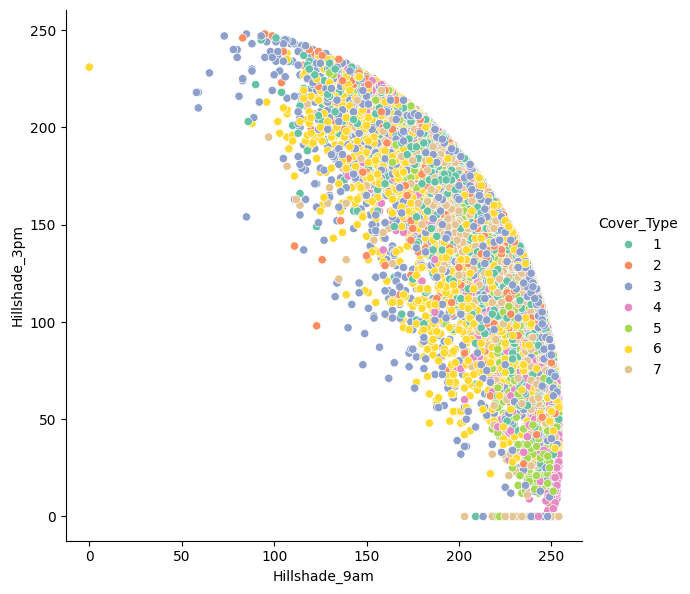

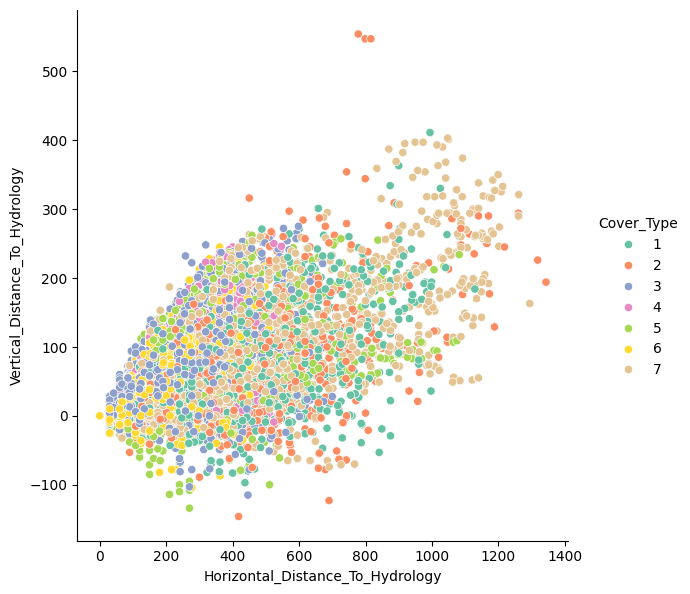

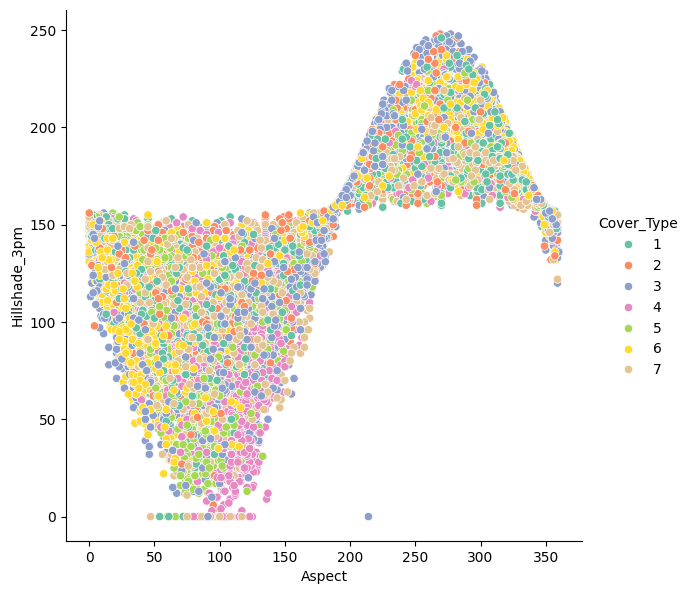

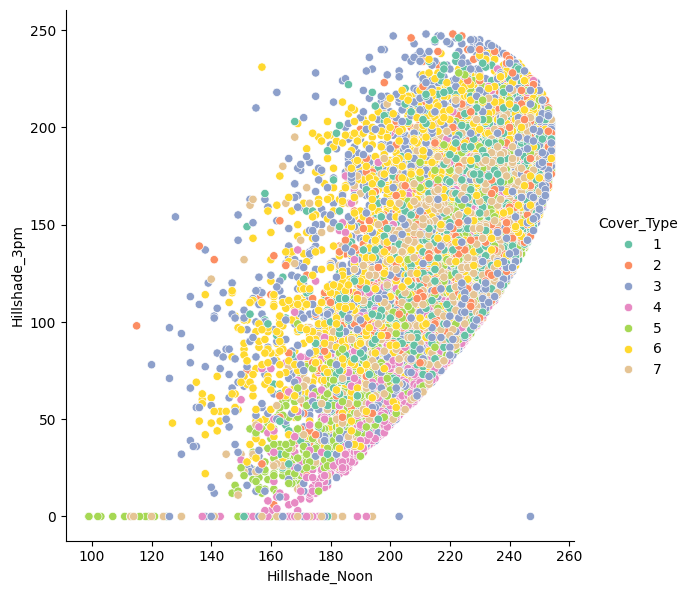

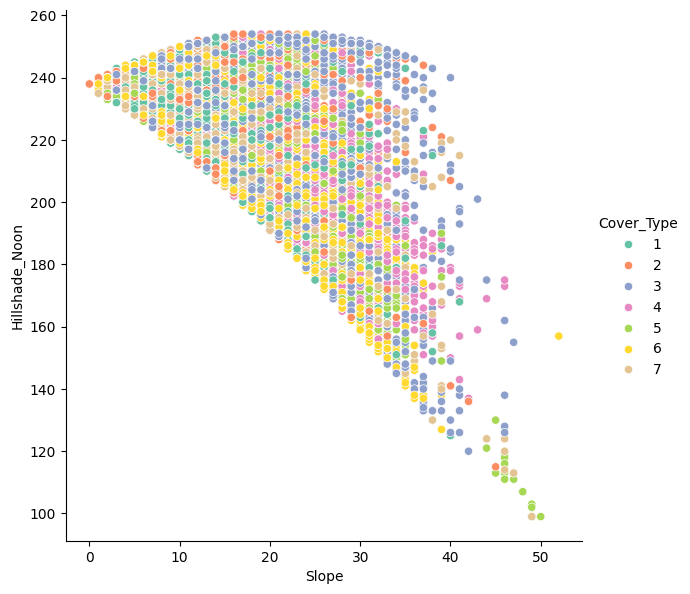

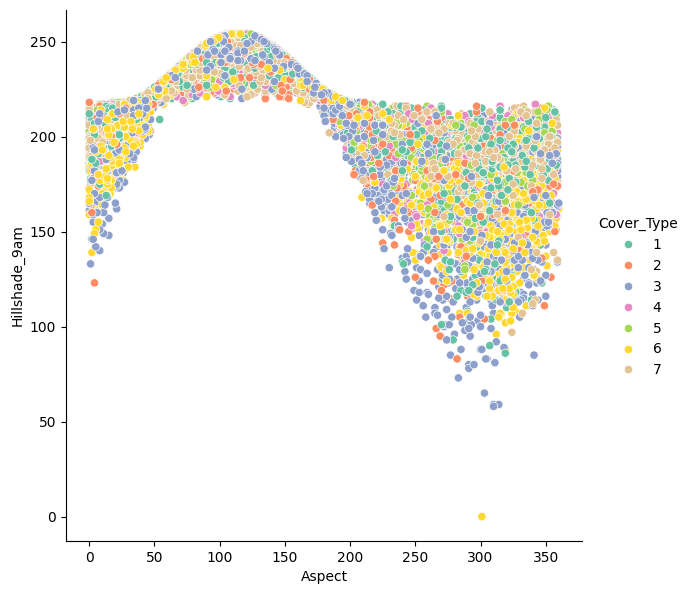

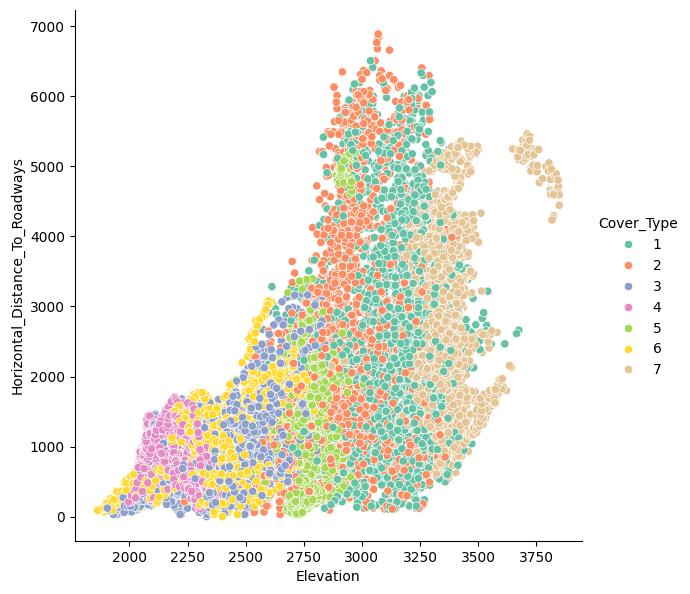

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=7)  # Example palette with 7 colors

# Scatter plot of only the highly correlated pairs
for v, i, j in s_corr_list:
    sns.pairplot(
        dataset,
        hue="Cover_Type",
        palette=custom_palette,
        size=6,
        x_vars=cols[i],
        y_vars=cols[j]
    )
    plt.show()

In [56]:
X = dataset.iloc[:,0:54].values
y = dataset.iloc[:, 54:55].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
X_train.shape

(12096, 54)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[-1.27394609 -1.26063934 -0.53098159 ... -0.23124663 -0.21279501
  -0.17363233]
 [-1.46824711 -0.34320177 -0.76786556 ... -0.23124663 -0.21279501
  -0.17363233]
 [-1.10123407 -0.43403718  1.12720615 ... -0.23124663 -0.21279501
  -0.17363233]
 ...
 [ 2.49693302  1.6824277  -0.53098159 ... -0.23124663 -0.21279501
   5.7592961 ]
 [-0.50873589 -1.2515558  -0.88630754 ... -0.23124663 -0.21279501
  -0.17363233]
 [-1.00528295 -0.38861947 -0.05721367 ... -0.23124663 -0.21279501
  -0.17363233]]


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [61]:
print(explained_variance)

[0.08170256 0.05756698]


In [62]:
print(pca.singular_values_)  

[226.6941888  190.28707997]


In [68]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [69]:
print("SVM Accuracy :", accuracy_score(y_test, y_pred))

SVM Accuracy : 0.7245370370370371


In [70]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(X_train)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[ 1.47745234  1.24641777 -0.88630754 ...  4.32438732 -0.21279501
  -0.17363233]
 [-1.27154731 -0.42495364  1.12720615 ... -0.23124663 -0.21279501
  -0.17363233]
 [ 1.48944623  0.9829951  -1.24163349 ... -0.23124663 -0.21279501
   5.7592961 ]
 ...
 [ 1.83247149  0.0110563   1.24564814 ... -0.23124663 -0.21279501
  -0.17363233]
 [-0.42237988 -0.69745984  2.19318399 ... -0.23124663 -0.21279501
  -0.17363233]
 [-0.03137906  1.33725317 -0.88630754 ... -0.23124663 -0.21279501
  -0.17363233]]


0.7043650793650794

In [71]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train,y_train)
y2_LSVC_model = LSVC.predict(X_test)
print("LSVC Accuracy :", accuracy_score(y_test, y2_LSVC_model))

LSVC Accuracy : 0.6782407407407407


In [72]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

classifierSVM  = SVC(kernel = 'rbf', random_state = 0)

In [73]:
classifierSVM.fit(X_train, y_train)

SVC(random_state=0)

In [84]:
from sklearn.metrics import accuracy_score

# Shift the labels to start from 0
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

# Fit the model
XGclassifier.fit(X_train, y_train)

# Make predictions
y_pred = XGclassifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.8446


In [85]:
from xgboost import XGBClassifier
XGclassifier = XGBClassifier()

In [86]:
XGclassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
# Predicting the Test set results
y_pred = XGclassifier.predict(X_test)

In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [94]:
from sklearn.model_selection import cross_val_score

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = XGclassifier, X = X_train, y = y_train, cv = 3)

# Print the mean and standard deviation of the accuracies
print(f"Cross-validation mean accuracy: {accuracies.mean():.4f}")
print(f"Cross-validation std deviation: {accuracies.std():.4f}")

Cross-validation mean accuracy: 0.8434
Cross-validation std deviation: 0.0036


In [95]:
from sklearn.metrics import accuracy_score, classification_report

accXG=XGclassifier.score(X_test,y_test)
print('The accuracy of XGBOOST classifier is : ',accXG)

The accuracy of XGBOOST classifier is :  0.8445767195767195


In [96]:
modelXG = XGBClassifier()
modelXG.fit(X_train, y_train)
# make predic tions for test data
y_pred = modelXG.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracyXG = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracyXG * 100.0))

Accuracy: 84.46%


In [97]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=300,class_weight='balanced',n_jobs=2,random_state=42)

In [98]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=2,
                       random_state=42)

In [99]:
pred=rf.predict(X_test)

In [100]:
acc=rf.score(X_test,y_test)
print('The accuracy of Random Forest classifier is : ',acc)

The accuracy of Random Forest classifier is :  0.84755291005291


IndexError: list index out of range

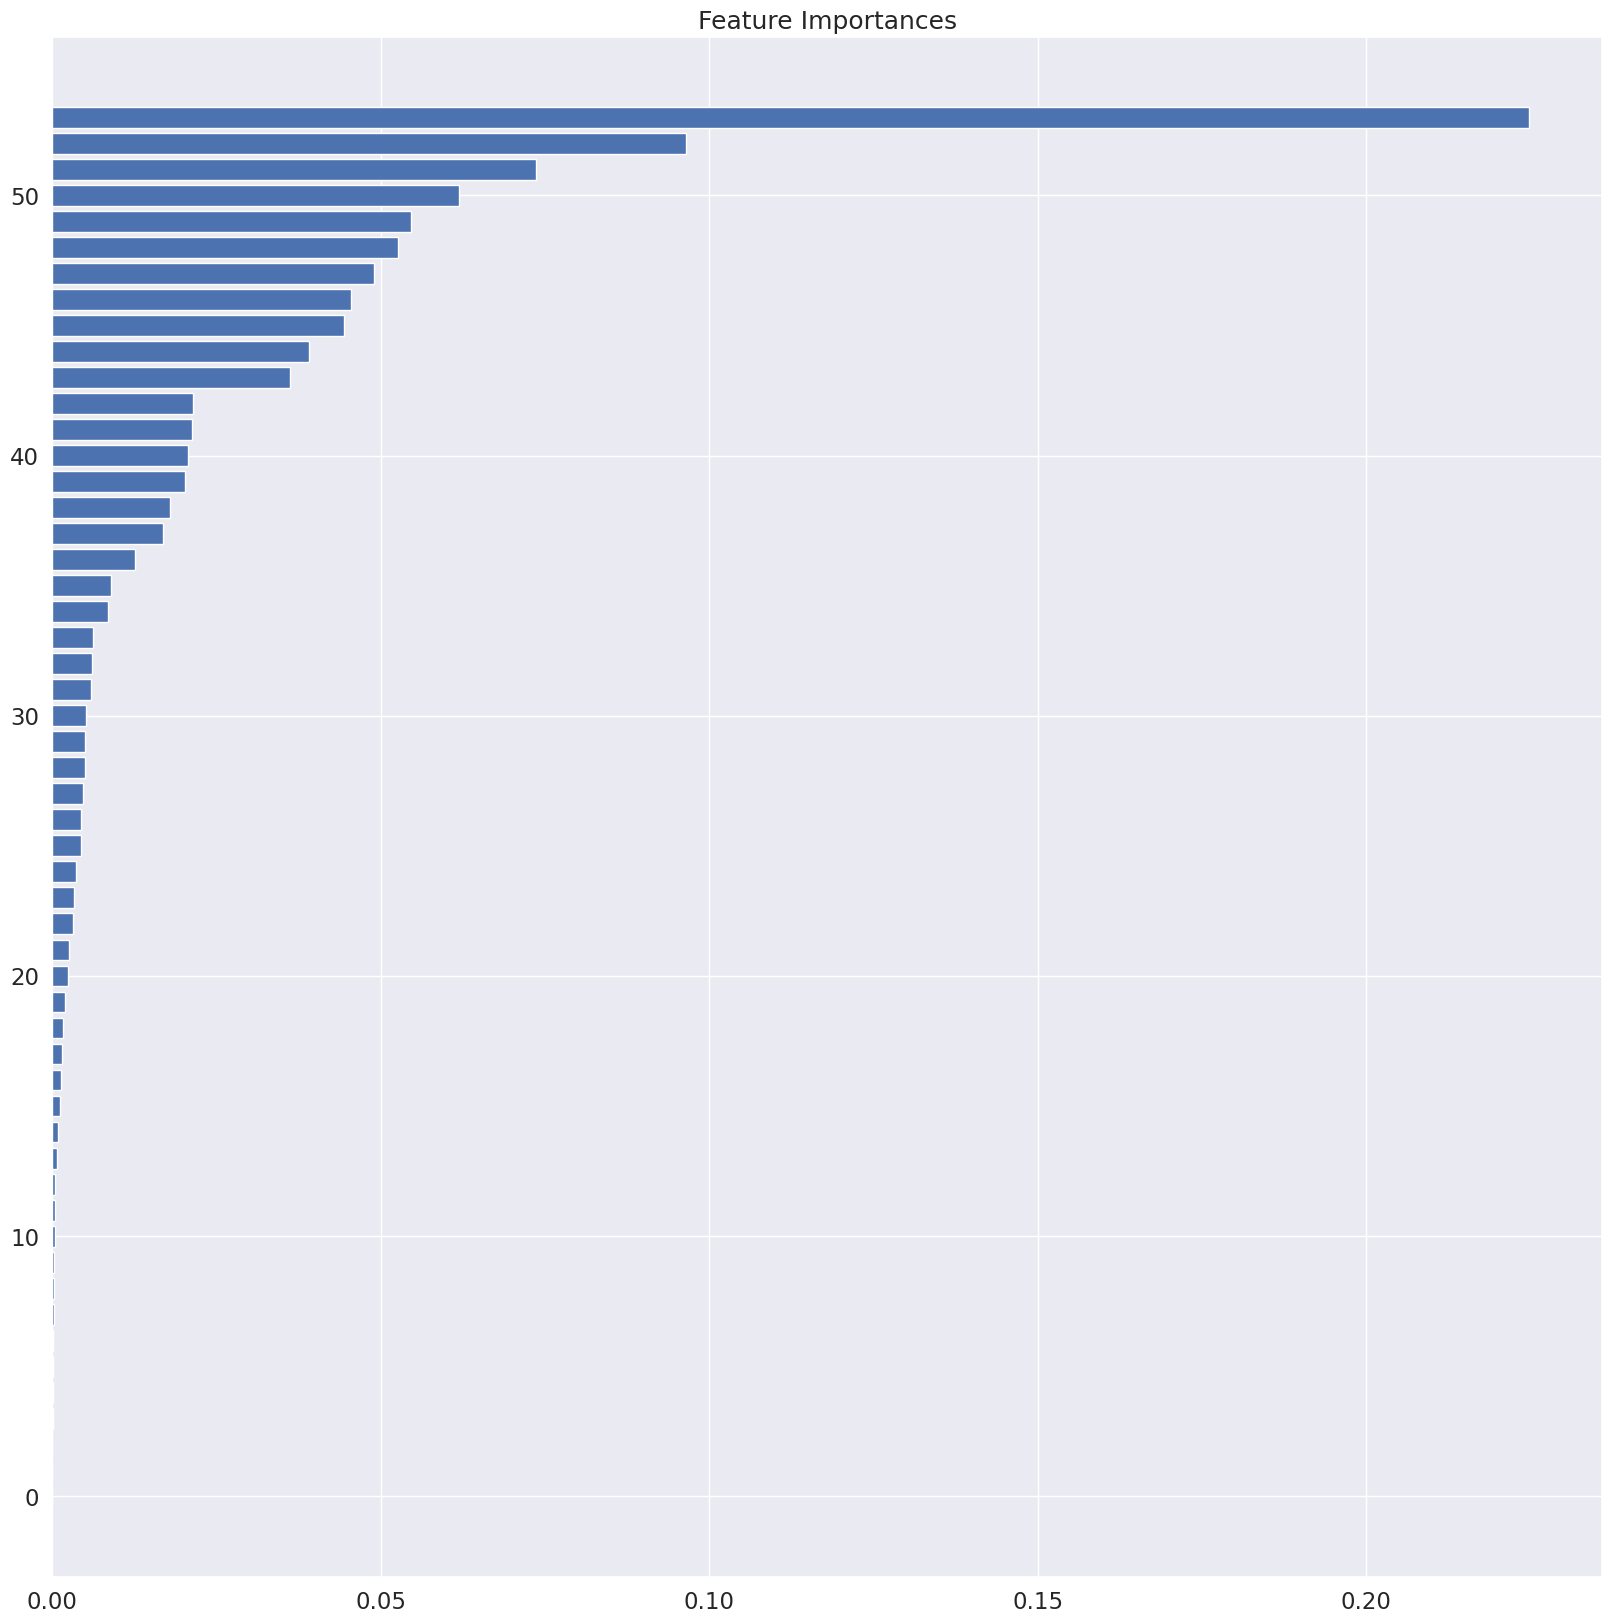

In [108]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Define the feature names manually if X_train is an ndarray
features_list = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']  

fig = plt.figure()
fig.set_size_inches(20, 20)
sns.set(font_scale=1.5)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

# Use the manually defined features list for the y-ticks
plt.yticks(range(len(indices)), [features_list[i] for i in indices])  
plt.xlabel('Relative Importance')

plt.show()

In [109]:
X_train.shape

(12096, 54)

In [115]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [116]:
Y = to_categorical(y_train)  # One-hot encode y_train if necessary

modelNN = Sequential()
modelNN.add(Dense(200, input_dim=54, activation='relu'))  # Adjust input_dim as necessary
modelNN.add(Dense(150, activation='relu'))
modelNN.add(Dropout(0.2))

# Update the number of output classes (set to 7 based on the number of unique classes in y_train)
modelNN.add(Dense(7, activation='softmax'))

modelNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
modelNN.fit(X_train, Y, epochs=20, batch_size=10)

Epoch 1/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5863 - loss: 1.0377
Epoch 2/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7174 - loss: 0.6856
Epoch 3/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 0.6080
Epoch 4/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7631 - loss: 0.5521
Epoch 5/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7719 - loss: 0.5399
Epoch 6/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7839 - loss: 0.5061
Epoch 7/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8040 - loss: 0.4799
Epoch 8/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8071 - loss: 0.4699
Epoch 9/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8136 - loss: 0.4320
Epoch 10/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8221 - loss: 0.4360
Epoch 11/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8284 - loss: 0.4156
Epoch 12/20
1210/1210 ━━━━━━━━

In [117]:
# evaluate the model
scores = modelNN.evaluate(X_train, Y)
print("\n%s: %.2f%%" % (modelNN.metrics_names[1], scores[1]*100))

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8866 - loss: 0.2867

compile_metrics: 88.91%


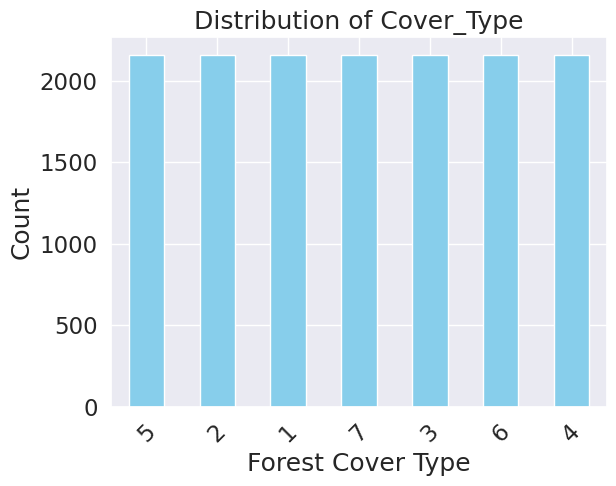

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a bar plot for Cover_Type distribution
cover_type_counts = df['Cover_Type'].value_counts()
cover_type_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Cover_Type')
plt.xlabel('Forest Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

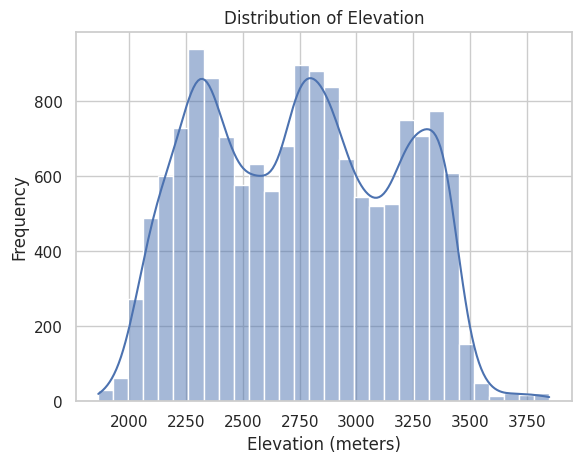

In [127]:
# Visualize Elevation distribution
sns.histplot(df['Elevation'], kde=True, bins=30)
plt.title('Distribution of Elevation')
plt.xlabel('Elevation (meters)')
plt.ylabel('Frequency')
plt.show()

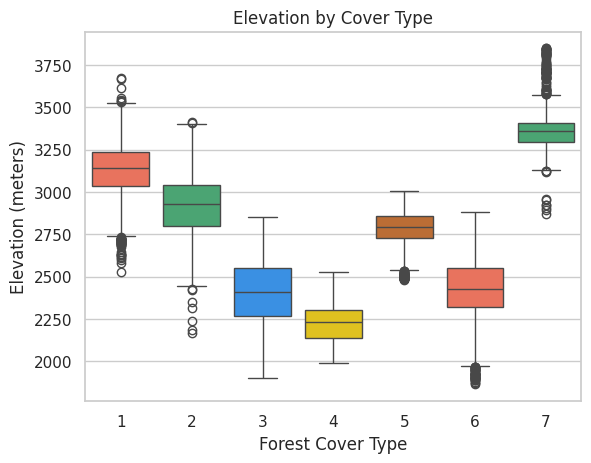

In [132]:
# Custom color palette for boxplot
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette=['#FF6347', '#3CB371', '#1E90FF', '#FFD700', '#D2691E'])
plt.title('Elevation by Cover Type')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation (meters)')
plt.show()

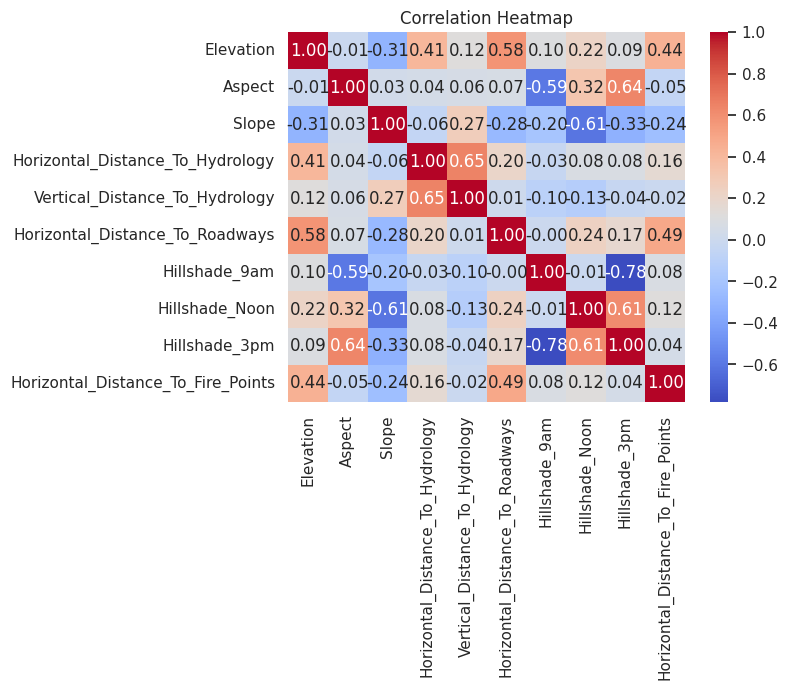

In [134]:
# Correlation heatmap for numerical features
numerical_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [135]:
# Feature Preparation
# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [136]:
# Data Splitting
# Define features (X) and target (y)
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [137]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nData split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 5: Train a Model (Random Forest Classifier)
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Data split completed:
Training set: 10584 samples
Validation set: 2268 samples
Test set: 2268 samples

Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [138]:
# Evaluate on validation set
y_val_pred = model.predict(X_val)
print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           1       0.82      0.79      0.80       312
           2       0.81      0.70      0.75       319
           3       0.84      0.86      0.85       323
           4       0.94      0.98      0.96       333
           5       0.90      0.96      0.93       331
           6       0.87      0.87      0.87       340
           7       0.95      0.97      0.96       310

    accuracy                           0.88      2268
   macro avg       0.87      0.88      0.87      2268
weighted avg       0.88      0.88      0.88      2268



In [139]:
# Test the Model
y_test_pred = model.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Test Set Performance:
Accuracy: 0.8589065255731922

Confusion Matrix:
[[237  42   1   0  12   0  16]
 [ 73 226   8   0  25   5   2]
 [  0   1 254  20   2  45   0]
 [  0   0   2 323   0   3   0]
 [  1  11   8   0 297   2   0]
 [  0   1  18   9   1 281   0]
 [ 12   0   0   0   0   0 330]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       308
           2       0.80      0.67      0.73       339
           3       0.87      0.79      0.83       322
           4       0.92      0.98      0.95       328
           5       0.88      0.93      0.91       319
           6       0.84      0.91      0.87       310
           7       0.95      0.96      0.96       342

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268



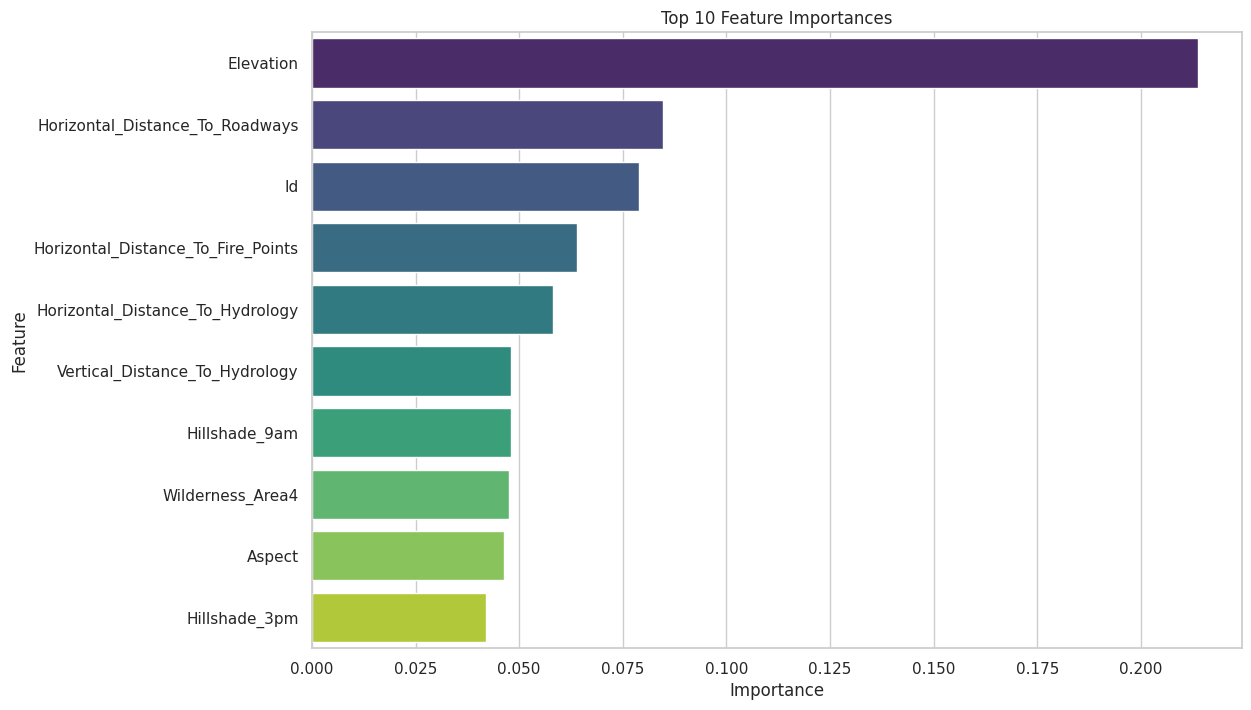

In [140]:
# Optional: Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values[:10], y=feature_importances.index[:10], palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()